# Confidence interval for poisson parameter $\lambda$

## Relation between Poisson and $\chi^{2}$ distributions

**References:**
- [Norman L. Johnson Adrienne W. Kemp Samuel Kotz: Univariate Discrete Distributions](dx.doi.org/10.1002/0471715816)
    - Section 4.5 Approximations, bounds, and transformation
    - Section 4.12.2 Gamma Distribution
- [Statsdirect: Poisson Rate Confidence Interval](https://www.statsdirect.com/help/rates/poisson_rate_confidence_interval.htm)

\begin{equation}
\begin{aligned}
    X &\sim Poi(\lambda)\\
    Y &\sim \chi^{2}\left(df=2 (\nu+1) \right)
\end{aligned}
\end{equation}

\begin{equation}
    Pr\left[X \leq \nu \right]
    =
    Pr\left[Y \geq 2 \lambda \right]
\end{equation}

\begin{equation}
    CDF_{Poi(\lambda)}\left( \nu \right)
    =
    1 - CDF_{\chi^{2}(df=2 (\nu+1))} \left( 2\lambda \right)
\end{equation}

## One-sided, upper confidence interval for $\lambda$

\begin{equation}
    N \sim Poi(\lambda)
\end{equation}

We observe $N=n_{obs}$ events. Construct the one-sided, upper bound confidence interval with $\alpha$ significance level ($1-\alpha$ confidence level).

**Reformulating problem:**

Find $\lambda^{U.L.}$ such that:

\begin{equation}
    \alpha = \sum_{n=0}^{n=n_{obs}}  Poi (n, \lambda=\lambda_{U.L})
\end{equation}

Using the relation between Poission and $\chi^{2}$ distribution (see above), the right side can be expressed as:

\begin{equation}
    \sum_{n=0}^{n=n_{obs}}  Poi (n, \lambda=\lambda_{U.L})
    =
    CDF_{Poi(\lambda^{U.L.})}\left( n_{obs} \right)
    =
    1 - CDF_{\chi^{2}(df=2(n_{obs}+1) )} \left( 2\lambda^{U.L.} \right),
\end{equation}

yielding

\begin{equation}
    \alpha
    =
    1 - CDF_{\chi^{2}(df=2(n_{obs}+1) )} \left( 2\lambda^{U.L.} \right)
\end{equation}

Rearranging the terms:

\begin{equation}
    CDF_{\chi^{2}(df=2(n_{obs}+1) )} \left( 2\lambda^{U.L.} \right) = 1 - \alpha
\end{equation}

Taking the inverse of the $CDF_{\chi^{2}(df=2(n_{obs}+1) )}$ function

\begin{equation}
    2\lambda^{U.L.}
    =
    CDF^{-1}_{\chi^{2}(df=2(n_{obs}+1) )} (1 - \alpha) 
\end{equation}

we find the $\lambda^{U.L.}$ is:

\begin{equation}
    \lambda^{U.L.}
    =
    \frac{1}{2}
    CDF^{-1}_{\chi^{2}(df=2(n_{obs}+1) )} (1 - \alpha) 
\end{equation}

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calc_lambda_CI_upper(n_obs, alpha=0.05):
    """Calculates the one-sided, upper bound confidence interval with α significance level"""
    chi2_df = 2 * (n_obs+1)
    lambda_UL = 0.5 * scipy.stats.chi2.ppf(1.0-alpha, df=chi2_df)
    return lambda_UL

In [3]:
def calc_lambda_CI_two_sided(n_obs, alpha=0.05): 
    """
    Calculates the two-sided, symmetric confidence interval with α significance level.
    """
    lambda_CI_LL = 0.5 * scipy.stats.chi2.ppf(  alpha/2.0, 2*(n_obs))
    lambda_CI_UL = 0.5 * scipy.stats.chi2.ppf(1.0-alpha/2.0, 2*(n_obs+1))
    return lambda_CI_LL, lambda_CI_UL

In [4]:
def calc_CI_bounds(n_obs, alpha):
    lambda_CI_LL_twosided, lambda_CI_UL_twosided = calc_lambda_CI_two_sided(n_obs, alpha=0.05)
    lambda_CI_UL_onesided = calc_lambda_CI_upper(n_obs, alpha=0.05)
    return lambda_CI_LL_twosided, lambda_CI_UL_twosided, lambda_CI_UL_onesided

In [5]:
def show_confidence_intervals(experiments, xmin_inf = -1e10, figsize=(10,8)):

    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    ax = axes.flatten()

    for i, experiment in enumerate(experiments):
        n = experiment[0]
        ll_2s = experiment[1]
        ul_2s = experiment[2]
        ul_1s = experiment[3]
        ax[0].scatter(n, 2*i, c='navy',)
        ax[1].scatter(n, 2*i, c='navy',)
        ax[0].hlines(2*i, xmin=ll_2s, xmax=ul_2s, colors='r')
        ax[1].hlines(2*i, xmin=xmin_inf, xmax=ul_1s, colors='purple')

    ax[0].axvline(lambda_true, linestyle='--', label=r"$\lambda_{true}$", c='k')
    ax[1].axvline(lambda_true, linestyle='--', label=r"$\lambda_{true}$", c='k')
    
    ax[0].scatter(experiments[0,0], 0, c='navy', label='$n_{obs}$')
    ax[1].scatter(experiments[0,0], 0, c='navy', label='$n_{obs}$')
    
    ax[0].hlines(9, xmin=experiments[0,1], xmax=experiments[0,2], colors='r', label='Two-sided CI')
    ax[1].hlines(0, xmin=xmin_inf, xmax=experiments[0,3], colors='purple', label='One-sided, upper bound CI')

    ax[0].legend()
    ax[1].legend(loc='upper left',  bbox_to_anchor=(1,1))
    
    ax[0].set_xlim(0.0, 30.0)
    ax[1].set_xlim(0.0, 30.0)

    ax[0].get_yaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)

    #ax[0].set_xlabel(r"$\lambda$")
    #ax[1].set_xlabel(r"$\lambda$")

    ax[0].set_title(r"Two-sided confidence interval")
    ax[1].set_title(r"One-sided, upper bounded confidence interval")
    
    return fig, ax

## Demonstration

In [6]:
nsamples = 10000
lambda_true = 5
alpha = 0.05

In [7]:
n_obs = scipy.stats.poisson.rvs(mu=lambda_true, size=nsamples)

In [8]:
CI_bounds = np.array([calc_CI_bounds(n, alpha) for n in n_obs])

In [9]:
experiments = np.c_[n_obs, CI_bounds]

### Generated sampels

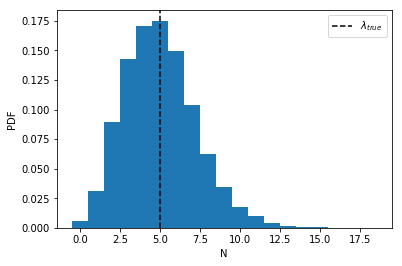

In [10]:
fig, ax = plt.subplots()
bins = np.array(range(0,20))-0.5
ax.hist(experiments[:,0], bins=bins, density=True);
ax.axvline(lambda_true, linestyle='--', c='k', label="$\lambda_{true}$")
ax.set_xlabel('N')
ax.set_ylabel('PDF')
ax.legend();

### Confidence intervals

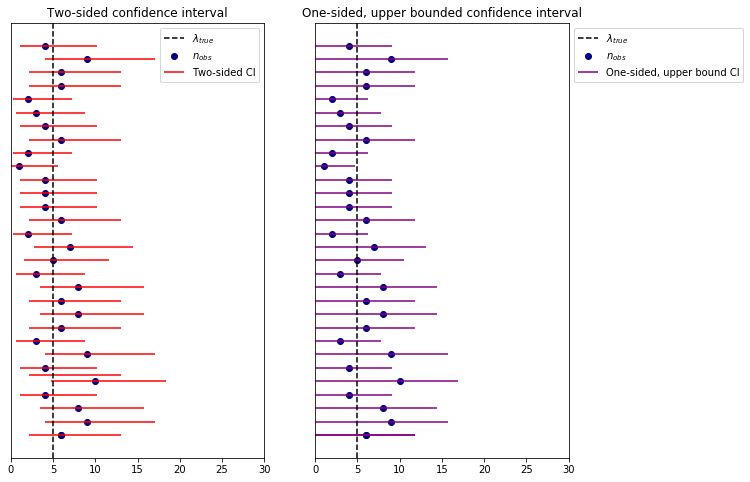

In [11]:
fig, ax = show_confidence_intervals(experiments[:30])

Find examples where $\lambda_{true}$ is outside the confidence interval

In [12]:
not_covered_2s_examples = experiments[np.where((experiments[:,1] > lambda_true) | (experiments[:,2] < lambda_true))]
not_covered_1s_examples = experiments[np.where(experiments[:,3] < lambda_true)]

(<Figure size 576x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2ed197f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd2ecfc3cc0>], dtype=object))

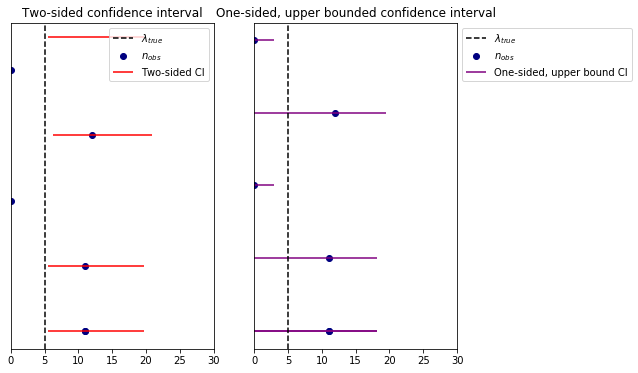

In [13]:
show_confidence_intervals(not_covered_2s_examples[:5], figsize=(8,6))

(<Figure size 576x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2ecd37b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd2ecf59710>], dtype=object))

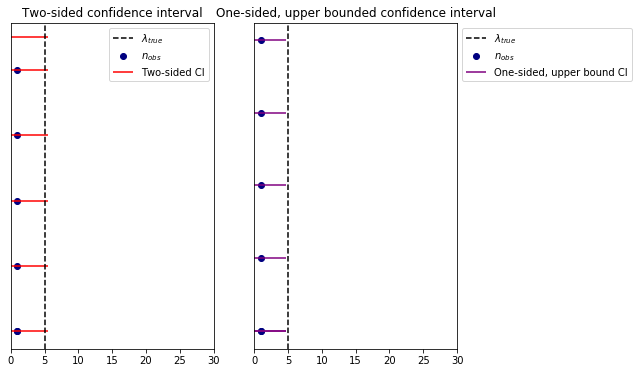

In [14]:
show_confidence_intervals(not_covered_1s_examples[:5], figsize=(8,6))

### Calculate empirical coverage

In [15]:
coverage_CI_2s_empirical = 1.0-len(not_covered_2s_examples)/len(experiments)
coverage_CI_1s_empirical = 1.0-len(not_covered_1s_examples)/len(experiments)
coverage_CI_2s_empirical, coverage_CI_1s_empirical

(0.9775, 0.9629)